In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# Data Load

Data set link: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset

Description:
A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

Acknowledgement:
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.
Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

Objective:
Understand the Dataset & cleanup (if required).
Build Regression models to predict the sales w.r.t a single & multiple feature.
Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

In [3]:
df = pd.read_csv(r"C:\Users\Admin\Desktop\project_showcase\big project 1-house price prediction website\model\Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


##### Drop unnecessary features: stories, 'mainroad','guestroom','basement','hotwaterheating', 'parking', 'prefarea', 'furnishingstatus'

In [114]:
df2 = df.drop(['stories', 'mainroad','guestroom','basement','hotwaterheating', 'parking', 'prefarea', 'furnishingstatus'],axis='columns')
df2.head()

,price,area,bedrooms,bathrooms,airconditioning
0,13300000,7420,4,2,yes
1,12250000,8960,4,4,yes
2,12250000,9960,3,2,no
3,12215000,7500,4,2,yes
4,11410000,7420,4,1,yes


# Data Cleaning: Handle null values

In [115]:
df2.isnull().sum()

price              0
area               0
bedrooms           0
bathrooms          0
airconditioning    0
dtype: int64

In [116]:
df3 = df2.dropna()
df3.isnull().sum()

price              0
area               0
bedrooms           0
bathrooms          0
airconditioning    0
dtype: int64

In [117]:
df3.head()

,price,area,bedrooms,bathrooms,airconditioning
0,13300000,7420,4,2,yes
1,12250000,8960,4,4,yes
2,12250000,9960,3,2,no
3,12215000,7500,4,2,yes
4,11410000,7420,4,1,yes


# Feature Engineering

#### Handle not float value of total_sqft feature

In [118]:
df3.area.unique()

array([ 7420,  8960,  9960,  7500,  8580, 16200,  8100,  5750, 13200,
        6000,  6550,  3500,  7800,  6600,  8500,  4600,  6420,  4320,
        7155,  8050,  4560,  8800,  6540,  8875,  7950,  5500,  7475,
        7000,  4880,  5960,  6840,  7482,  9000,  6360,  6480,  4300,
        7440,  6325,  5150, 11440,  7680,  8880,  6240, 11175,  7700,
       12090,  4000,  5020,  4040,  4260,  6500,  5700, 10500,  3760,
        8250,  6670,  3960,  7410,  5000,  6750,  4800,  7200,  4100,
        6400,  6350,  4500,  5450,  3240,  6615,  8372,  9620,  6800,
        8000,  6900,  3700,  7020,  7231,  6254,  7320,  6525, 15600,
        7160, 11460,  5828,  5200,  5400,  4640,  5800,  6660,  4700,
        5136,  4400,  3300,  3650,  6100,  2817,  7980,  3150,  6210,
        6825,  6710,  6450, 10269,  8400,  5300,  3800,  9800,  8520,
        6050,  7085,  3180,  3410,  3000, 11410,  5720,  3540,  7600,
       10700,  8150,  4410,  7686,  2800,  5948,  4200,  4520,  4095,
        4120,  4770,

In [119]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [120]:
# return the value of total_sqft that is not float (in a range for example)
df3[~df3['area'].apply(is_float)].head(10)

,price,area,bedrooms,bathrooms,airconditioning


No null value

#### Add new feature called price per area

In [121]:
df4 = df3.copy()
df4['price_per_area'] = df4['price']/df4['area']
df4.head()

,price,area,bedrooms,bathrooms,airconditioning,price_per_area
0,13300000,7420,4,2,yes,1792.452830
1,12250000,8960,4,4,yes,1367.187500
2,12250000,9960,3,2,no,1229.919679
3,12215000,7500,4,2,yes,1628.666667
4,11410000,7420,4,1,yes,1537.735849


In [122]:
df4_stats = df4['price_per_area'].describe()
df4_stats

count     545.000000
mean      993.326978
std       346.537025
min       270.395550
25%       745.370370
50%       952.380952
75%      1184.615385
max      2640.000000
Name: price_per_area, dtype: float64

Text(0, 0.5, 'Count')

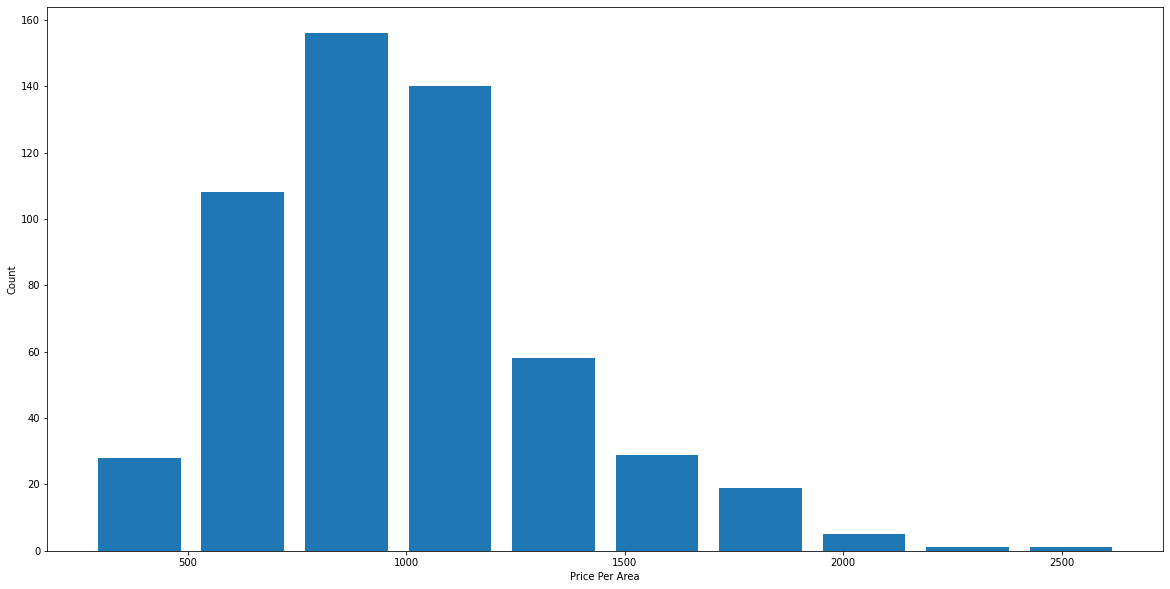

In [123]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df4.price_per_area,rwidth=0.8)
plt.xlabel("Price Per Area")
plt.ylabel("Count")

# Outlier Removal Using Bathrooms Feature


In [124]:
df4.bathrooms.unique()

array([2, 4, 1, 3], dtype=int64)

Text(0, 0.5, 'Count')

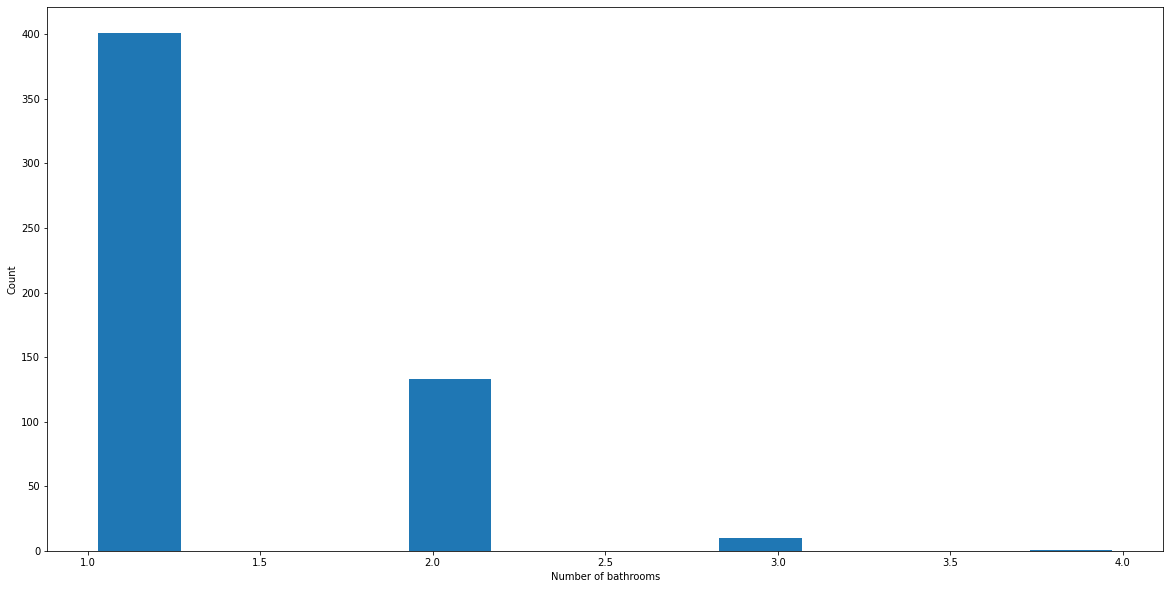

In [125]:
plt.hist(df4.bathrooms,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

#### Make sure there is no house with 2 more bathrooms than number of bedrooms in a home



In [126]:
df4[df4.bathrooms>df4.bedrooms+2]

,price,area,bedrooms,bathrooms,airconditioning,price_per_area


In [127]:
df4.head(3)

,price,area,bedrooms,bathrooms,airconditioning,price_per_area
0,13300000,7420,4,2,yes,1792.452830
1,12250000,8960,4,4,yes,1367.187500
2,12250000,9960,3,2,no,1229.919679


# Use One Hot Encoding For airconditioning


In [133]:
dummies = pd.get_dummies(df4.airconditioning)
dummies.head(3)

,no,yes
0,0,1
1,0,1
2,1,0


In [134]:
df5 = pd.concat([df4,dummies],axis='columns')
df5.head()

,price,area,bedrooms,bathrooms,airconditioning,price_per_area,no,yes
0,13300000,7420,4,2,yes,1792.452830,0,1
1,12250000,8960,4,4,yes,1367.187500,0,1
2,12250000,9960,3,2,no,1229.919679,1,0
3,12215000,7500,4,2,yes,1628.666667,0,1
4,11410000,7420,4,1,yes,1537.735849,0,1


In [135]:
df6 = df5.drop('airconditioning',axis='columns')
df7 = df6.rename(columns={"no": "no_aircon", "yes": "yes_aircon"})
df7.head(5)

,price,area,bedrooms,bathrooms,price_per_area,no_aircon,yes_aircon
0,13300000,7420,4,2,1792.452830,0,1
1,12250000,8960,4,4,1367.187500,0,1
2,12250000,9960,3,2,1229.919679,1,0
3,12215000,7500,4,2,1628.666667,0,1
4,11410000,7420,4,1,1537.735849,0,1


# Build model using linear regression

In [138]:
df7.shape

(545, 7)

In [139]:
X = df7.drop(['price'],axis='columns')
X.head(3)

,area,bedrooms,bathrooms,price_per_area,no_aircon,yes_aircon
0,7420,4,2,1792.452830,0,1
1,8960,4,4,1367.187500,0,1
2,9960,3,2,1229.919679,1,0


In [140]:
X.shape

(545, 6)

In [141]:
y = df7.price
y.head(3)

0    13300000
1    12250000
2    12250000
Name: price, dtype: int64

In [142]:
len(y)

545

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [144]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.790653212750284

In [145]:
lr_clf.coef_

array([    723.11139881,   35820.33550147,  476433.00692909,
          3923.88078787, -231787.28972271,  231787.28972271])

In [146]:
lr_clf.intercept_

-3465711.3933161423

# Measuring accuracy of LinearRegression model using K Fold cross validation


In [147]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.7781349 , 0.84679852, 0.85978115, 0.77585903, 0.88181259])

# Test the model for few properties


In [148]:
X.columns

Index(['area', 'bedrooms', 'bathrooms', 'price_per_area', 'no_aircon',
       'yes_aircon'],
      dtype='object')

In [150]:
np.where(X.columns=='no_aircon')[0][0]


4

In [151]:
def predict_price(aircon,area,bathrooms,bedrooms):    
    air_index = np.where(X.columns==aircon)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = area
    x[1] = bathrooms
    x[2] = bedrooms
    if air_index >= 0:
        x[air_index] = 1

    return lr_clf.predict([x])[0]

In [157]:
predict_price('yes_aircon',9000, 2, 2)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


4298585.170531744

In [159]:
predict_price('yes_aircon',5000, 1, 4)

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2323185.2536599915

# Export the tested model to a pickle file


In [160]:
import pickle
with open('housing.pickle','wb') as f:
    pickle.dump(lr_clf,f)

# Export column information 

In [161]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))